<a href="https://colab.research.google.com/github/mpawank/Linear_regression/blob/main/2_implementing_Linear_Regression_model_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CREATING LINEAR_REGRESSION MODEL**

In [ ]:
# importing numpy library
import numpy as np

**Linear Regression**

In [ ]:
class Linear_Regression():

  # initiating the parameters (learning rate & no. of iterations)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  def fit(self, X, Y ):

    # number of training examples & number of features

    self.m, self.n = X.shape  # number of rows & columns

    # initiating the weight and bias

    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent

    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):

    Y_prediction = self.predict(self.X)

    # calculate gradients

    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

    db = - 2 * np.sum(self.Y - Y_prediction)/self.m

    # upadating the weights

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db


  def predict(self, X):

    return X.dot(self.w) + self.b



**IMPLEMENTING THE LINEAR REGREESION**


In [ ]:
#importing library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


#data preprocessing



In [ ]:
#IMPORTIN LOADIND DATA CSV TO PANDAS DATA FRAME'
salary_data = pd.read_csv('/content/salary_data.csv')


In [ ]:
salary_data.head()


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
#last five rows and columns
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [ ]:
#print number of rows and columns
salary_data.shape #-> (no of rows, no of cols)




(30, 2)

In [ ]:
# checking for missing values
salary_data.isnull().sum() # we should check for the missing values evrytime

YearsExperience    0
Salary             0
dtype: int64

spliting feature and target

In [ ]:
# now spliting the data in x and y or target and feature

x=salary_data.iloc[:,:-1].values
y=salary_data.iloc[:,-1].values


In [ ]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [ ]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


spliting the dataset into trainig and test data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=2)

training linear regression model

In [ ]:
model = Linear_Regression(learning_rate=0.02,no_of_iterations=100)

In [ ]:
model.fit(x_train,y_train)

In [ ]:
#printing the parameters values
print ('weight=',model.w[0])
print ('bias=',model.b)

weight= 10941.258155090314
bias= 13499.045037502532


y=9514.400999035135(x)+23697.40650713630

so....
SALARY=9514(EXPERIANCE)+23697

predicting for the salry value for test data

In [ ]:
test_data_prediction=model.predict(x_test)

In [ ]:
print(test_data_prediction)

[ 27722.68063912  25534.4290081   62734.70673541  53981.70021134
  91181.97793864  79146.59396804 103217.36190924  46322.81950277
  35381.56134768  87899.60049212]


visualizing the predicted vs the actual values

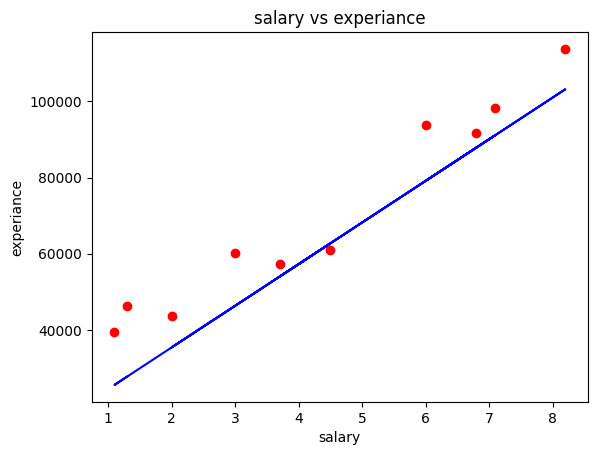

In [ ]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,test_data_prediction,color='blue')
plt.xlabel("salary")
plt.ylabel("experiance")
plt.title("salary vs experiance")
plt.show()